In [10]:
import json
import os
import pandas as pd
import numpy as np
from functools import reduce
import re
from collections import Counter
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import pearsonr as pearsonr
import math
import matplotlib.pyplot as plt
import seaborn as sns
seed = 42
np.random.seed(seed)


In [11]:
f_dir2_mu = os.listdir(
    "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs_sigma_mu_while_training/sigma_mu_VAE/mean")
dir2_mu = "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs_sigma_mu_while_training/sigma_mu_VAE/mean/"
f_dir2_var = os.listdir(
    "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs_sigma_mu_while_training/sigma_mu_VAE/var")
dir2_var = "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs_sigma_mu_while_training/sigma_mu_VAE/var/"
dir2_root = "/mnt/dzl_bioinf/binliu/deepRNA/data_and_results_all_samples_gene_no_earlystopping_500_epochs_sigma_mu_while_training/"
add_f2 = "gene + "


In [12]:
prior_list = ['priorVAE', 'beta_priorVAE']

In [13]:
all_res_mu = [dir2_mu + i for i in f_dir2_mu]
all_res_var = [dir2_var + i for i in f_dir2_var]
name_list = [add_f2 + i[0:-len('mean_results_vae.npy')] for i in f_dir2_mu]
anno2 = 'gene'
annoName2 = '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/prior_distribution/bootstrap_mean_MsigDB_' + anno2 + '_level.csv'
annoList = [annoName2 for i in range(len(f_dir2_mu))]
annoName2Sig = '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/prior_distribution/bootstrap_sigma_MsigDB_' + anno2 + '_level.csv'
annoListSig = [annoName2Sig for i in range(len(f_dir2_mu))]


In [14]:
test2 = 'gene'
trainName2 = '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/' + \
    test2 + '_level_train_test/all_samples_' + test2 + '_level_train.pkl'
trainList = [trainName2 for i in range(len(f_dir2_mu))]
testName2 = '/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/' + \
    test2 + '_level_train_test/all_samples_' + test2 + '_level_test.pkl'
testList = [testName2 for i in range(len(f_dir2_mu))]


In [40]:
main_dir = '/mnt/dzl_bioinf/binliu/deepRNA/deepRNA/deepRNA_Py/post_hoc_all_samples/no_early_stopping_500_epochs_new_sigma_mu/'
pdf_dir = 'ms_prior_real_mu_dimensional_correlation_pdf'


In [16]:

anno = pd.read_csv(
    "/mnt/dzl_bioinf/binliu/deepRNA/data_all_samples/prior_distribution/bootstrap_mean_MsigDB_transcript_level.csv", index_col=0)
anno_name = list(anno.columns)
anno_name = [single[9:] for single in anno_name]


In [27]:
save_all_res_mean_correlation = {}
for counter in range(len(all_res_mu)):
    latent_mean = np.load(all_res_mu[counter])
    latent_var = np.load(all_res_var[counter])
    test_shape = latent_mean.shape[0]

    mu_prior = pd.read_csv(annoList[counter], index_col=0)
    var_prior = pd.read_csv(
        annoListSig[counter], index_col=0)

    X_test = pd.read_pickle(testList[counter])
    index_df_test = X_test.index
    transcripts_nr = X_test.shape[1]
    colnames_df = X_test.columns
    X_test.columns = colnames_df
    X_test.set_index(index_df_test, inplace=True)
    pathway_nr = mu_prior.shape[1]
    mu_prior = mu_prior.add_suffix('_mu')
    var_prior = var_prior.add_suffix('_sigma')
    X_test = X_test.join(mu_prior)
    X_test = X_test.join(var_prior)

    mu_prior_test = X_test.iloc[:, transcripts_nr:(transcripts_nr+pathway_nr)]
    var_prior_test = X_test.iloc[:, (transcripts_nr+pathway_nr):]
    final_corr = []
    
    if all_res_mu[counter].find('prior') != -1:
        for j in range(mu_prior_test.shape[1]):
            corr = pearsonr(latent_mean[:, j], mu_prior_test.iloc[:, j])[0]
            final_corr.append(corr)
        save_all_res_mean_correlation[name_list[counter]] = final_corr
        #print(name_list[counter])
    else: continue
    
    
    
    


In [32]:
all_corr_mean = pd.DataFrame(save_all_res_mean_correlation)


In [38]:
all_corr_mean_melted = pd.melt(all_corr_mean)


<AxesSubplot:xlabel='variable', ylabel='value'>

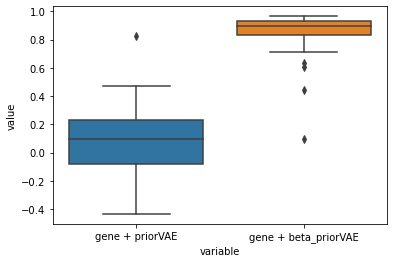

In [39]:
sns.boxplot(x='variable', y='value', data=all_corr_mean_melted)


In [49]:
ax = sns.boxplot(x='variable', y='value', data=all_corr_mean_melted)
ax.set(xlabel='Model name', ylabel='The correlation across dimensions')
plt.gcf().set_size_inches(4.2, 4.7)
plt.xticks(rotation=270)
plt.tight_layout()
plt.savefig(main_dir + pdf_dir + '/' +
            name_list[counter] + 'boxplot_average_correlation.pdf')
plt.close()
